<a href="https://colab.research.google.com/github/magomezma-svg/Senales-y-sistemas/blob/main/taller_28_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 1.5

La detección coherente de modulación por amplitud (AM) es una técnica de demodulación que utiliza una señal de referencia (oscilador local) que está sincronizada en frecuencia y fase con la portadora original en el transmisor. Al multiplicar la señal AM recibida por esta portadora local sincronizada y luego pasarla a través de un filtro pasa bajo, se puede recuperar la señal de mensaje original.

¿En qué consiste?

Multiplicación: La señal AM recibida se multiplica por una señal generada localmente que tiene la misma frecuencia y fase que la portadora original. Esta operación desplaza el espectro de frecuencia de la señal AM hacia frecuencias más bajas y más altas. Filtrado Pasa Bajo: Un filtro pasa bajo se utiliza para eliminar las componentes de alta frecuencia resultantes de la multiplicación, dejando solo la señal de mensaje original que se ha desplazado a frecuencias más bajas (cerca de DC). Aplicaciones:

La detección coherente se utiliza en sistemas de comunicación donde se requiere una alta fidelidad y eficiencia espectral. Algunas aplicaciones incluyen:

Radiodifusión AM de Alta Fidelidad: Aunque la detección de envolvente es más común en receptores AM simples, la detección coherente puede ofrecer una mejor calidad de audio y resistencia a la distorsión, especialmente en presencia de ruido. Sistemas de Comunicación Digital: En la transmisión de datos digitales utilizando esquemas de modulación de amplitud como QAM (Modulación de Amplitud en Cuadratura), la detección coherente es esencial para recuperar correctamente la información. Radar: En sistemas de radar, la detección coherente se utiliza para procesar las señales de eco y extraer información sobre la velocidad del objetivo a través del efecto Doppler. Sistemas de Comunicación Militar y de Seguridad: Donde la robustez contra interferencias y la seguridad son críticas. En resumen, la detección coherente es un método de demodulación potente que, aunque requiere una sincronización precisa de la portadora, ofrece un rendimiento superior en términos de recuperación de la señal y resistencia al ruido en comparación con métodos de detección no coherente como la detección de envolvente.

Introduce el índice de modulación (por ejemplo, 0.8): 0.8


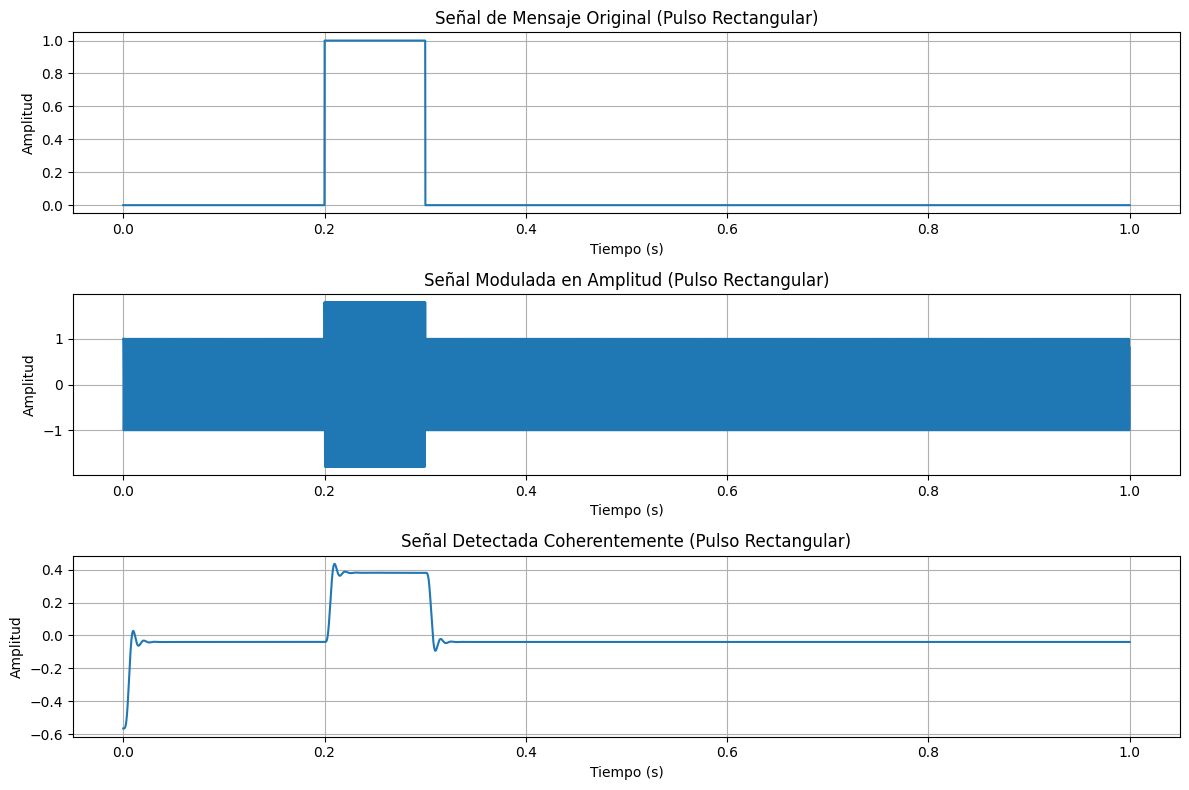

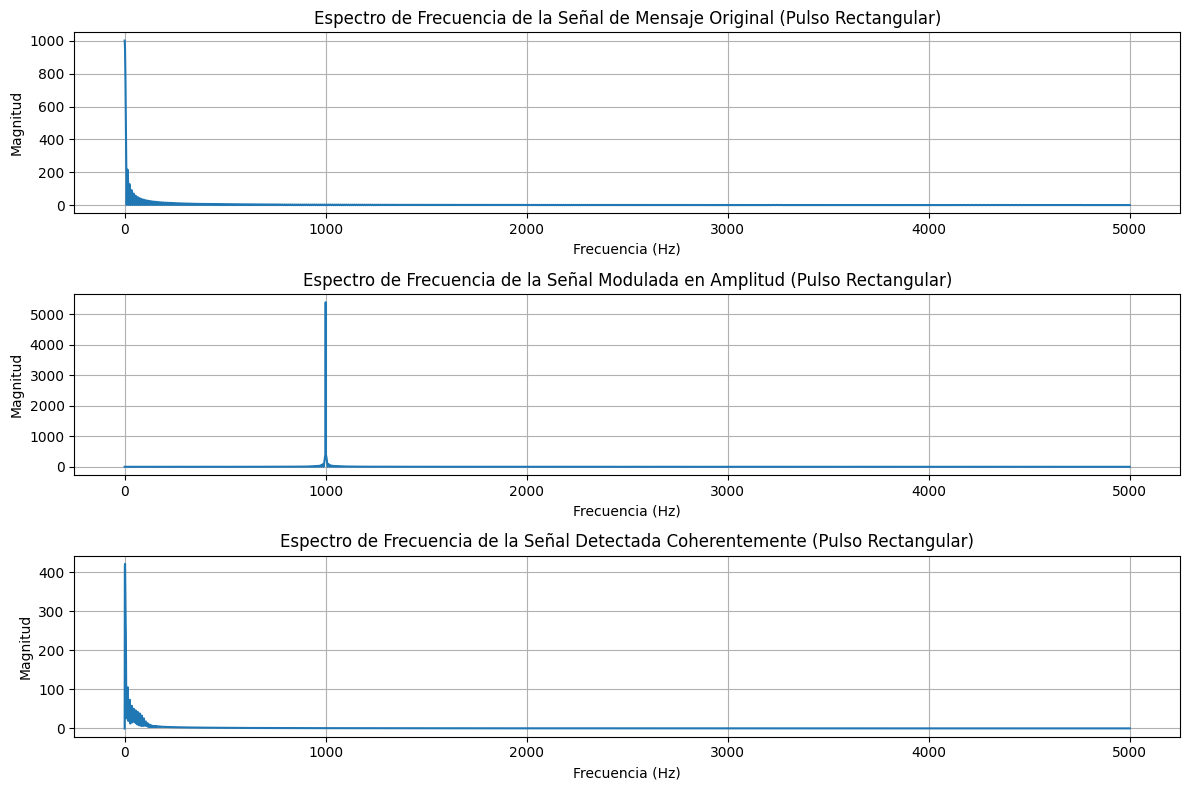

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, lfilter

# 1. Definir parámetros
fs = 10000  # Frecuencia de muestreo
T = 1/fs    # Período de muestreo
duration = 1  # Duración de la señal en segundos
t = np.arange(0, duration, T) # Vector de tiempo

fc = 1000 # Frecuencia de la portadora
pulse_start_time = 0.2 # Tiempo de inicio del pulso rectangular
pulse_duration = 0.1 # Duración del pulso rectangular
fm = 50  # Frecuencia de la señal de mensaje coseno

# Obtener el índice de modulación del usuario con validación
while True:
    try:
        modulation_index = float(input("Introduce el índice de modulación (por ejemplo, 0.8): "))
        if modulation_index >= 0: # Asegurar que el índice de modulación sea no negativo
            break
        else:
            print("El índice de modulación debe ser un número no negativo.")
    except ValueError:
        print("Entrada inválida. Por favor, introduce un número.")


# 2. Crear la señal de mensaje de pulso rectangular
message_signal_pulse = np.zeros_like(t)
message_signal_pulse[(t >= pulse_start_time) & (t <= pulse_start_time + pulse_duration)] = 1

# Asegurar que la señal de mensaje esté en el rango [-1, 1] para que el índice de modulación tenga sentido
message_signal_pulse = message_signal_pulse / (np.max(np.abs(message_signal_pulse)) if np.max(np.abs(message_signal_pulse)) > 0 else 1)

# 3. Implementar Modulación de Amplitud (Pulso Rectangular)
carrier_signal = np.cos(2 * np.pi * fc * t)
modulated_signal_pulse = (1 + modulation_index * message_signal_pulse) * carrier_signal

# 4. Implementar Detección Coherente (Pulso Rectangular)
# Crear una señal de oscilador local sincronizada
local_oscillator = np.cos(2 * np.pi * fc * t)

# Multiplicar la señal recibida por el oscilador local
multiplied_signal_pulse = modulated_signal_pulse * local_oscillator

# Diseñar un filtro pasa bajo
nyquist = 0.5 * fs
cutoff_frequency = fc / 10  # Ajustar la frecuencia de corte según sea necesario, típicamente menor que la portadora
normal_cutoff = cutoff_frequency / nyquist
# Obtener los coeficientes del filtro
b, a = butter(5, normal_cutoff, btype='low', analog=False) # Filtro Butterworth de 5to orden

# Aplicar el filtro pasa bajo
detected_signal_pulse = lfilter(b, a, multiplied_signal_pulse)

# Escalar la señal detectada para que coincida con la amplitud de la señal de mensaje original
scaling_factor_pulse = np.max(np.abs(message_signal_pulse)) / (np.max(np.abs(detected_signal_pulse)) if np.max(np.abs(detected_signal_pulse)) > 0 else 1)
detected_signal_scaled_pulse = detected_signal_pulse * scaling_factor_pulse

# Eliminar el desplazamiento de CC de la señal detectada para una mejor comparación con el mensaje original
detected_signal_scaled_pulse = detected_signal_scaled_pulse - np.mean(detected_signal_scaled_pulse)


# 5. Graficar las señales en el dominio del tiempo (Pulso Rectangular)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, message_signal_pulse)
plt.title('Señal de Mensaje Original (Pulso Rectangular)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, modulated_signal_pulse)
plt.title('Señal Modulada en Amplitud (Pulso Rectangular)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, detected_signal_scaled_pulse)
plt.title('Señal Detectada Coherentemente (Pulso Rectangular)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Calcular la RFFT de las señales (Pulso Rectangular)
message_signal_pulse_fft = rfft(message_signal_pulse)
modulated_signal_pulse_fft = rfft(modulated_signal_pulse)
detected_signal_pulse_fft = rfft(detected_signal_scaled_pulse)

# Obtener el eje de frecuencias para la RFFT
freqs = rfftfreq(len(t), T)

# 7. Graficar las señales en el dominio de la frecuencia (Pulso Rectangular)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs, np.abs(message_signal_pulse_fft))
plt.title('Espectro de Frecuencia de la Señal de Mensaje Original (Pulso Rectangular)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs, np.abs(modulated_signal_pulse_fft))
plt.title('Espectro de Frecuencia de la Señal Modulada en Amplitud (Pulso Rectangular)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freqs, np.abs(detected_signal_pulse_fft))
plt.title('Espectro de Frecuencia de la Señal Detectada Coherentemente (Pulso Rectangular)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

plt.tight_layout()
plt.show()